# Rizky Indrabayu

# ------------------------------------------------------------------------

# Search Engine using BM25 algorithm + Random Forest (as evaluation performances)
### Step 1. Import library + Dataset

In [74]:
import pandas as pd
from rank_bm25 import BM25Okapi
from nltk.tokenize import word_tokenize
import nltk

df = pd.read_csv('Narkotika_data(PN JOMBANG).csv')
df

,Tanggal,Penuntut Umum,Terdakwa,Nomor Putusan,Kata Kunci,Tanggal Register,Lembaga Peradilan,Hakim Ketua,Hakim Anggota,Panitera,Catatan Amar
0,Tanggal 27 Juni 2023 — Penuntut Umum:,"AGUS SUROTO , SH",DEBIK IRAWAN BiN SUPRIADI,181/Pid.Sus/2023/PN Jbg,...,23 Mei 2023,PN JOMBANG,Hakim Ketua Ida Ayu Masyuni,"Hakim Anggota Muhammad Riduansyah, Br Hakim A...",Panitera Pengganti: Gatut Prakosa,M E N G A D I L I: Menyatakan Terdakwa DEBIK I...
1,Tanggal 6 Juli 2023 — Penuntut Umum:,"WIRADHYAKSA MOCHAMAD HARIADI PUTRA,S.H.,M.H",SLAMET HADIWIJAYANTO bin KUSDIYAN,193/Pid.Sus/2023/PN Jbg,...,25 Mei 2023,PN JOMBANG,Hakim Ketua Ida Ayu Masyuni,"Hakim Anggota Muhammad Riduansyah, Br Hakim A...",Panitera Pengganti: Karimulyatim,M E N G A D I L I Menyatakan Terdakwa SLAMET ...
2,Tanggal 13 Juli 2023 — Penuntut Umum:,"SULTONI, S.H.,M.H",YUDHA ADITYA alias ADIT bin KARJO,210/Pid.Sus/2023/PN Jbg,...,9 Juni 2023,PN JOMBANG,Hakim Ketua Luki Eko Andrianto,"Hakim Anggota Muhammad Riduansyah, Br Hakim A...",Panitera Pengganti: Gatut Prakosa,MENGADILI Menyatakan Terdakwa YUDHA ADITYA ali...
3,Tanggal 20 Juli 2023 — Penuntut Umum:,ALDI DEMAS AKIRA,EKA YULIASTINI Binti SAMUJI,218/Pid.Sus/2023/PN Jbg,...,14 Juni 2023,PN JOMBANG,Hakim Ketua Luki Eko Andrianto,"Hakim Anggota Muhammad Riduansyah, Br Hakim A...",Panitera Pengganti: Mudjiman,MENGADILI Menyatakan Terdakwa EKA YULIASTINI ...
4,Tanggal 13 Juli 2023 — Penuntut Umum:,"ADI PRASETYO,S.H",BUDI SANTOSO Bin JAYUS Alm,219/Pid.Sus/2023/PN Jbg,...,14 Juni 2023,PN JOMBANG,Hakim Ketua Luki Eko Andrianto,"Hakim Anggota Muhammad Riduansyah, Br Hakim A...",Panitera Pengganti Arie Syamsul Bahri,MENGADILI Menyatakan Terdakwa BUDI SANTOSO Bi...
...,...,...,...,...,...,...,...,...,...,...,...
57,Tanggal 27 Juni 2023 — Penuntut Umum:,"AGUS SUROTO , SH",DEBIK IRAWAN BiN SUPRIADI,181/Pid.Sus/2023/PN Jbg,...,23 Mei 2023,PN JOMBANG,Hakim Ketua Ida Ayu Masyuni,"Hakim Anggota Muhammad Riduansyah, Br Hakim A...",Panitera Pengganti: Gatut Prakosa,M E N G A D I L I: Menyatakan Terdakwa DEBIK I...
58,Tanggal 6 Juli 2023 — Penuntut Umum:,"WIRADHYAKSA MOCHAMAD HARIADI PUTRA,S.H.,M.H",SLAMET HADIWIJAYANTO bin KUSDIYAN,193/Pid.Sus/2023/PN Jbg,...,25 Mei 2023,PN JOMBANG,Hakim Ketua Ida Ayu Masyuni,"Hakim Anggota Muhammad Riduansyah, Br Hakim A...",Panitera Pengganti: Karimulyatim,M E N G A D I L I Menyatakan Terdakwa SLAMET ...
59,Tanggal 13 Juli 2023 — Penuntut Umum:,"SULTONI, S.H.,M.H",YUDHA ADITYA alias ADIT bin KARJO,210/Pid.Sus/2023/PN Jbg,...,9 Juni 2023,PN JOMBANG,Hakim Ketua Luki Eko Andrianto,"Hakim Anggota Muhammad Riduansyah, Br Hakim A...",Panitera Pengganti: Gatut Prakosa,MENGADILI Menyatakan Terdakwa YUDHA ADITYA ali...
60,Tanggal 15 Agustus 2023 — Penuntut Umum:,"Anjas Mega Lestari, S.H.",DIDIT ADITYA alias WAK NYO bin TOTOK SUYANTO,228/Pid.Sus/2023/PN Jbg,...,23 Juni 2023,PN JOMBANG,Hakim Ketua Muhammad Riduansyah,"Hakim Anggota Luki Eko Andrianto, Br Hakim An...",Panitera Pengganti: H. Satiman,Menyatakan Terdakwa DIDIT ADITYA alias WAK NY...


### Step 2. Data Preprocessing

In [75]:
tokenized_docs = [word_tokenize(doc.lower()) for doc in df['Catatan Amar']]
bm25 = BM25Okapi(tokenized_docs)

### Step 3. Create Function to sort Top 3 Query

In [76]:
def search(query):
    query = word_tokenize(query.lower())
    scores = bm25.get_scores(query)
    top_indexes = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:3]
    return df['Catatan Amar'].iloc[top_indexes]

### Step 4. Do search using query = "Ganja" 

In [77]:
query = search("Ganja")
print(query)

0    M E N G A D I L I: Menyatakan Terdakwa DEBIK I...
1     M E N G A D I L I Menyatakan Terdakwa SLAMET ...
2    MENGADILI Menyatakan Terdakwa YUDHA ADITYA ali...
Name: Catatan Amar, dtype: object


### Step 5. Create Model as Performance Evaluation using Random Forest Algorithm
In here, i use query="Sabu" to labelling the data. There are 13 instances that proven to has query="Sabu" in Catatan Amar. So, except 13 instances will be categorize to "Non Sabu". This is basically Binary Classification with manual labelling using machine. The evaluation performance and Confusion matrix are presented down below.

In [78]:
def rating(query):
    query = word_tokenize(query.lower())
    scores = bm25.get_scores(query)
    top_indexes = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:13]
    return top_indexes

In [79]:
index = rating('sabu')
df['Label'] = 0
df['Label'].iloc[index] = 1

/var/folders/_l/mh9hlz0s03xg8z3s309b4qgr0000gn/T/ipykernel_7117/2862687208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'].iloc[index] = 1


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Catatan Amar'])
y = df['Label']

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [83]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

predictions = rf.predict(X_test)
print(classification_report(y_test, predictions, target_names=['Non Sabu', 'Sabu']))

              precision    recall  f1-score   support

    Non Sabu       1.00      1.00      1.00        11
        Sabu       1.00      1.00      1.00         2

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



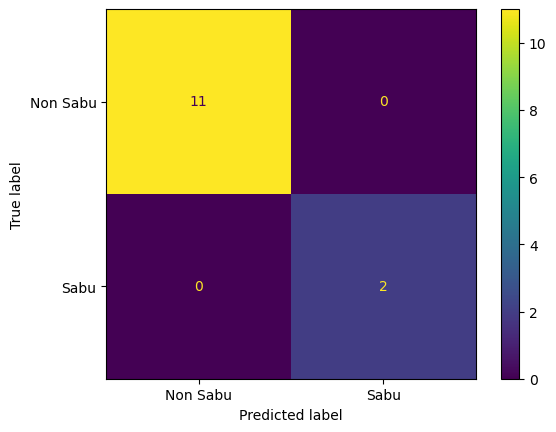

In [84]:
cfm = confusion_matrix(y_test, predictions)
fig = ConfusionMatrixDisplay(cfm, display_labels=['Non Sabu', 'Sabu'])
fig.plot()